# Frame element Response

Supported frame elements include most frame elements in OpenSees, including:

- ✅ elasticBeamColumn
- ✅ ElasticTimoshenkoBeam
- ✅ dispBeamColumn
- ✅ forceBeamColumn
- ✅ nonlinearBeamColumn
- ✅ ......

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import openseespy.opensees as ops

import opstool as opst

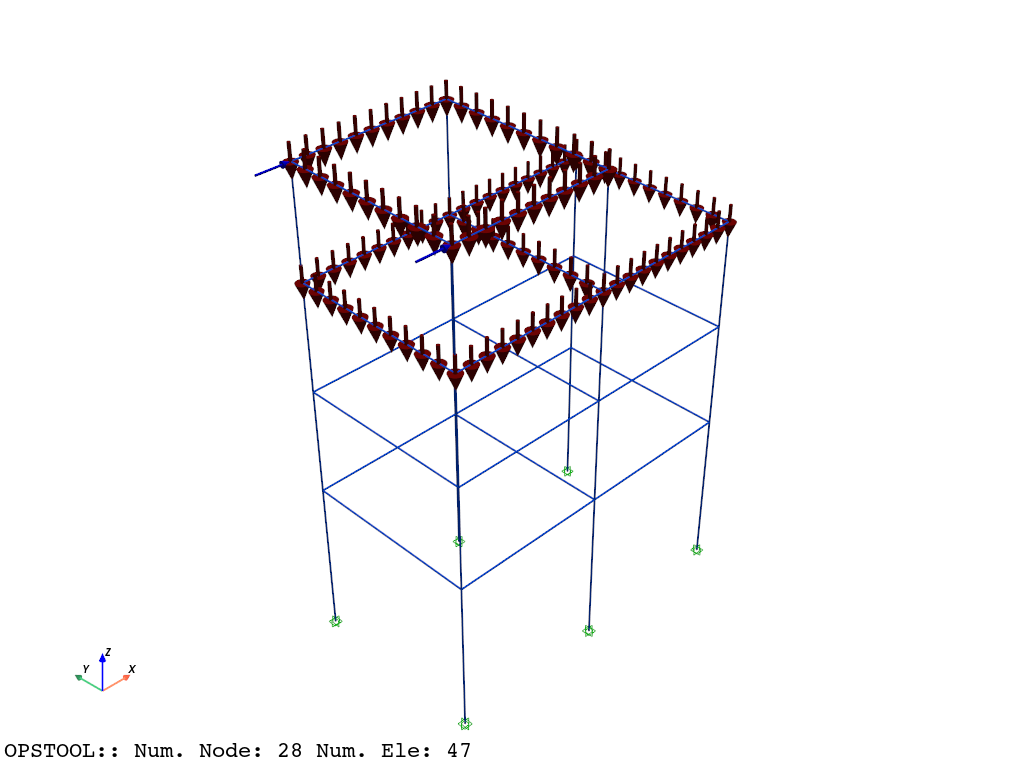

In [2]:
opst.load_ops_examples("Frame3D2")  # or your model code here

# add beam loads
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
ops.load(6, 10, 0.0, 0.0, 0.0, 0.0, 0.0)
ops.load(8, 10, 0.0, 0.0, 0.0, 0.0, 0.0)
for etag in [5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21]:
    ops.eleLoad("-ele", etag, "-type", "-beamUniform", 0.0, -10)

# plot
opst.vis.pyvista.set_plot_props(notebook=True)
fig = opst.vis.pyvista.plot_model(show_nodal_loads=True, show_ele_loads=True)
fig.show(jupyter_backend="static")

## Result Saving

In [3]:
ops.system("BandGeneral")
# Create the constraint handler, the transformation method
ops.constraints("Transformation")
# Create the DOF numberer, the reverse Cuthill-McKee algorithm
ops.numberer("RCM")
# Create the convergence test, the norm of the residual with a tolerance of
# 1e-12 and a max number of iterations of 10
ops.test("NormDispIncr", 1.0e-12, 10, 3)
# Create the solution algorithm, a Newton-Raphson algorithm
ops.algorithm("Newton")
# Create the integration scheme, the LoadControl scheme using steps of 0.1
ops.integrator("LoadControl", 0.1)
# Create the analysis object
ops.analysis("Static")

In [4]:
ODB = opst.post.CreateODB(odb_tag=1, elastic_frame_sec_points=9)
for i in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

dict_keys(['NodalData', 'FixedNodalData', 'NodalLoadData', 'FrameLoadData', 'BeamData', 'AllLineElesData', 'eleCenters'])
dict_keys(['NodalData', 'FixedNodalData', 'NodalLoadData', 'FrameLoadData', 'BeamData', 'AllLineElesData', 'eleCenters'])
dict_keys(['NodalData', 'FixedNodalData', 'NodalLoadData', 'FrameLoadData', 'BeamData', 'AllLineElesData', 'eleCenters'])
dict_keys(['NodalData', 'FixedNodalData', 'NodalLoadData', 'FrameLoadData', 'BeamData', 'AllLineElesData', 'eleCenters'])
dict_keys(['NodalData', 'FixedNodalData', 'NodalLoadData', 'FrameLoadData', 'BeamData', 'AllLineElesData', 'eleCenters'])
dict_keys(['NodalData', 'FixedNodalData', 'NodalLoadData', 'FrameLoadData', 'BeamData', 'AllLineElesData', 'eleCenters'])
dict_keys(['NodalData', 'FixedNodalData', 'NodalLoadData', 'FrameLoadData', 'BeamData', 'AllLineElesData', 'eleCenters'])
dict_keys(['NodalData', 'FixedNodalData', 'NodalLoadData', 'FrameLoadData', 'BeamData', 'AllLineElesData', 'eleCenters'])
dict_keys(['NodalData', 

OPSTOOL ::  All responses data with _odb_tag = 1 saved in .opstool.output/RespStepData-1.nc!

## Result Reading

In [5]:
all_resp = opst.post.get_element_responses(odb_tag=1, ele_type="Frame")

OPSTOOL ::  Loading Frame response data from .opstool.output/RespStepData-1.nc ...

The result is an ``xarray DataSet`` object, and we can access the associated DataArray objects through ``.data_vars``.

In [6]:
all_resp.data_vars

Data variables:
    localForces          (time, eleTags, localDofs) float32 25kB -0.0 ... 89.87
    basicForces          (time, eleTags, basicDofs) float32 12kB 0.0 ... -1.6...
    basicDeformations    (time, eleTags, basicDofs) float32 12kB 0.0 ... -2.0...
    plasticDeformation   (time, eleTags, basicDofs) float32 12kB 0.0 ... 0.0
    sectionForces        (time, eleTags, secPoints, secDofs) float32 112kB -0...
    sectionDeformations  (time, eleTags, secPoints, secDofs) float32 112kB 0....
    sectionLocs          (time, eleTags, secPoints, locs) float32 74kB 0.0 .....

The ``variable names``, along with their ``dimensions`` and ``coordinates``, are displayed above.
The first four represent the resistance and deformation at both ends of the element, while the last three are quantities related to the cross-section.

### Element resistance

The element local coordinate system resistance in opstool follows the following sign convention:

<img src="images/frame_force_sign.png" alt="frame_force_sign" width="600"/>

In [7]:
print(all_resp["localForces"])

<xarray.DataArray 'localForces' (time: 11, eleTags: 47, localDofs: 12)> Size: 25kB
array([[[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        ...,
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00]],

       [[-4.75025928e+03, -8.00031189e+02,  5.74703491e+02, ...,
          3.84109741e+02, -1.13577975e+06,  1.30496588e+06],
        [-4.75025928

The basic forces are a subset of the local resistance forces and are used to represent the independent components that need to be solved, while the remaining components can be obtained from the equilibrium equations.

In [8]:
print(all_resp["basicForces"])

<xarray.DataArray 'basicForces' (time: 11, eleTags: 47, basicDofs: 6)> Size: 12kB
array([[[ 0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -0.0000000e+00,  0.0000000e+00],
        ...,
        [ 0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -0.0000000e+00,  0.0000000e+00]],

       [[-4.7502593e+03, -1.0951276e+06,  1.3049659e+06,  5.8833088e+05,
         -1.1357798e+06,  3.8410974e+02],
        [-4.7502593e+03,  1.0951276e+06, -1.3049659e+06,  5.8833088e+05,
         -1.1357798e+06, 

We can also get the properties:

In [9]:
all_resp.attrs

{'localDofs': 'local coord system dofs at end 1 and end 2',
 'basicDofs': 'basic coord system dofs at end 1 and end 2',
 'secPoints': 'section points No.',
 'secDofs': 'section forces and deformations Dofs. Note that the section DOFs are only valid for <Elastic Section>, <Elastic Shear Section>, and <Fiber Section>. For <Aggregator Section>, you should carefully check the data, as it may not correspond directly to the DOFs.',
 'Notes': 'Note that the deformations are displacements and rotations in the basicDofs;And strains and curvatures in the secDofs'}

### Section response

Sometimes we are more concerned with the response at the section level, which can be easily extracted.
For example, extracting section forces involves four dimensions: ``time (time)``, ``element IDs (eleTags)``, ``section locations (secLocs)``, and ``degrees of freedom (secDoFs)``.

In [10]:
sec_forces = all_resp["sectionForces"]
sec_defos = all_resp["sectionDeformations"]

In [11]:
sec_locs = all_resp["sectionLocs"].sel(eleTags=6, time=0)
sec_locs

<xarray.DataArray 'sectionLocs' (secPoints: 9, locs: 4)> Size: 144B
array([[0.000e+00, 4.500e+03, 0.000e+00, 1.350e+04],
       [1.250e-01, 4.500e+03, 6.250e+02, 1.350e+04],
       [2.500e-01, 4.500e+03, 1.250e+03, 1.350e+04],
       [3.750e-01, 4.500e+03, 1.875e+03, 1.350e+04],
       [5.000e-01, 4.500e+03, 2.500e+03, 1.350e+04],
       [6.250e-01, 4.500e+03, 3.125e+03, 1.350e+04],
       [7.500e-01, 4.500e+03, 3.750e+03, 1.350e+04],
       [8.750e-01, 4.500e+03, 4.375e+03, 1.350e+04],
       [1.000e+00, 4.500e+03, 5.000e+03, 1.350e+04]], dtype=float32)
Coordinates:
    time       float32 4B 0.0
    eleTags    int32 4B 6
  * secPoints  (secPoints) int32 36B 1 2 3 4 5 6 7 8 9
  * locs       (locs) <U5 80B 'alpha' 'X' 'Y' 'Z'

We can select the response of multiple elements. 
``.isel(time=-1)`` is used to retrieve the data at the last time step, where ``.isel`` means indexing by position.

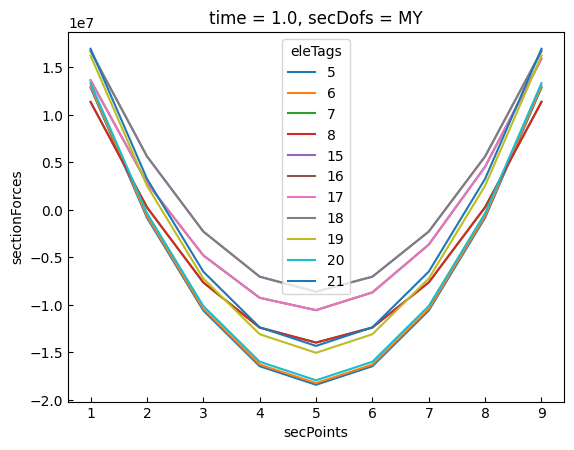

In [12]:
sec_forces_my = sec_forces.sel(
    eleTags=[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21],
    secDofs="MY",
).isel(time=-1)
# sec_forces_my.coords["secPoints"] = sec_locs

# plot
sec_forces_my.plot.line(x="secPoints")
plt.show()

Here, we retrieve the moment about the local y-axis for element 6:

Note: ``.sel`` is the abbreviation for "select".

In [13]:
sec_forces_my = sec_forces.sel(eleTags=6, secDofs="MY")
sec_defos_my = sec_defos.sel(eleTags=6, secDofs="MY")
print(sec_forces_my)

<xarray.DataArray 'sectionForces' (time: 11, secPoints: 9)> Size: 396B
array([[        0.  ,         0.  ,         0.  ,         0.  ,
                0.  ,         0.  ,         0.  ,         0.  ,
                0.  ],
       [  1302830.2 ,    -64357.25,  -1040919.75,  -1626857.2 ,
         -1822169.8 ,  -1626857.2 ,  -1040919.75,    -64357.25,
          1302830.2 ],
       [  2605660.5 ,   -128714.5 ,  -2081839.5 ,  -3253714.5 ,
         -3644339.5 ,  -3253714.5 ,  -2081839.5 ,   -128714.5 ,
          2605660.5 ],
       [  3908490.8 ,   -193071.75,  -3122759.2 ,  -4880571.5 ,
         -5466509.  ,  -4880571.5 ,  -3122759.2 ,   -193071.75,
          3908490.8 ],
       [  5211321.  ,   -257429.  ,  -4163679.  ,  -6507429.  ,
         -7288679.  ,  -6507429.  ,  -4163679.  ,   -257429.  ,
          5211321.  ],
       [  6514151.5 ,   -321786.  ,  -5204598.5 ,  -8134286.  ,
         -9110848.  ,  -8134286.  ,  -5204598.5 ,   -321786.  ,
          6514151.5 ],
       [  7816981.5 ,  

We can plot the moment at different section locations for various time steps.

In [14]:
sec_locs

<xarray.DataArray 'sectionLocs' (secPoints: 9, locs: 4)> Size: 144B
array([[0.000e+00, 4.500e+03, 0.000e+00, 1.350e+04],
       [1.250e-01, 4.500e+03, 6.250e+02, 1.350e+04],
       [2.500e-01, 4.500e+03, 1.250e+03, 1.350e+04],
       [3.750e-01, 4.500e+03, 1.875e+03, 1.350e+04],
       [5.000e-01, 4.500e+03, 2.500e+03, 1.350e+04],
       [6.250e-01, 4.500e+03, 3.125e+03, 1.350e+04],
       [7.500e-01, 4.500e+03, 3.750e+03, 1.350e+04],
       [8.750e-01, 4.500e+03, 4.375e+03, 1.350e+04],
       [1.000e+00, 4.500e+03, 5.000e+03, 1.350e+04]], dtype=float32)
Coordinates:
    time       float32 4B 0.0
    eleTags    int32 4B 6
  * secPoints  (secPoints) int32 36B 1 2 3 4 5 6 7 8 9
  * locs       (locs) <U5 80B 'alpha' 'X' 'Y' 'Z'

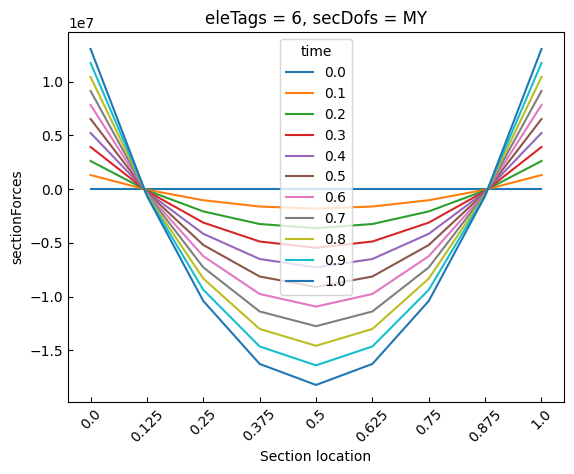

In [15]:
times = np.linspace(0, 1, 11)
sec_forces_my.coords["time"] = [f"{d:.1f}" for d in times]

# plot
sec_forces_my.plot.line(x="secPoints")
plt.xticks(ticks=sec_forces_my.secPoints, labels=sec_locs[:, 0].data, rotation=45)
plt.xlabel("Section location")
plt.show()

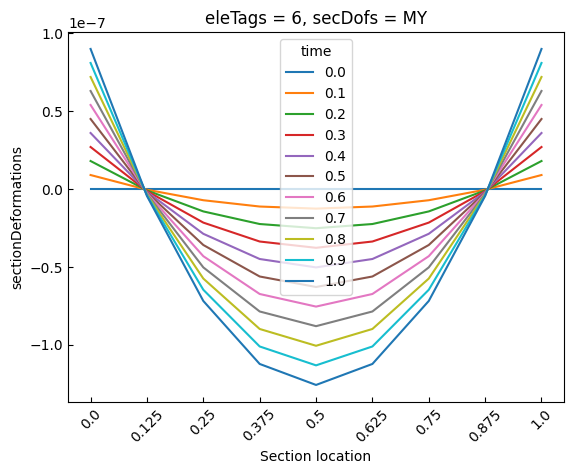

In [16]:
times = np.linspace(0, 1, 11)
sec_defos_my.coords["time"] = [f"{d:.1f}" for d in times]

# plot
sec_defos_my.plot.line(x="secPoints")
plt.xticks(ticks=sec_defos_my.secPoints, labels=sec_locs[:, 0].data, rotation=45)
plt.xlabel("Section location")
plt.show()